In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(
    np.c_[breast_cancer.data, breast_cancer.target], 
    columns = [list(breast_cancer.feature_names)+ ['target']]
                 )

In [ ]:
df.shape

(569, 31)

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

# Split the data into X and y

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((455, 30), (455,), (114, 30), (114,))

## Gaussian Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.9210526315789473

In [ ]:
from sklearn.metrics import confusion_matrix  
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)  
print(cm)

[[44  7]
 [ 2 61]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


So we got:

TP = 61
FP = 7
FN = 2
TN = 44

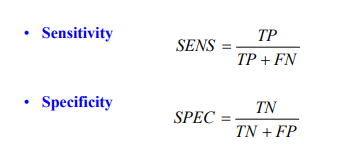

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        51
         1.0       0.90      0.97      0.93        63

    accuracy                           0.92       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



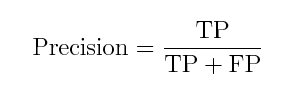

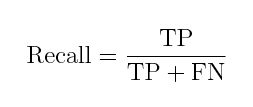

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


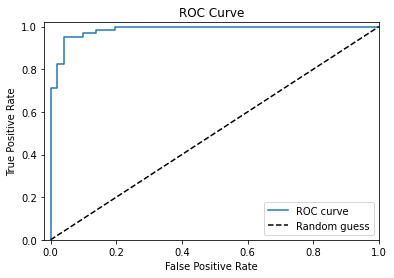

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
y_pred_prob = clf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred_prob)

0.9859943977591037

## Multinomial Naive Bayes

In [ ]:
clf_mn = MultinomialNB()
clf_mn.fit(X_train, y_train)
clf_mn.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.8421052631578947

In [ ]:
y_pred = clf_mn.predict(X_val)
cm = confusion_matrix(y_val, y_pred)  
print(cm)

[[36 15]
 [ 3 60]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80        51
         1.0       0.80      0.95      0.87        63

    accuracy                           0.84       114
   macro avg       0.86      0.83      0.83       114
weighted avg       0.86      0.84      0.84       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


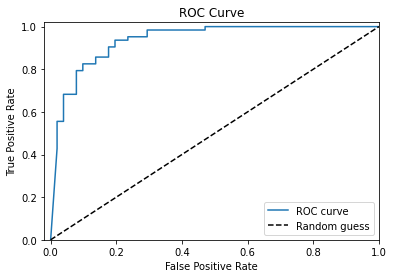

In [ ]:
y_pred_prob = clf_mn.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
roc_auc_score(y_val, y_pred_prob)

0.9369747899159664

## Bernoulli Naive Bayes

In [ ]:
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.5526315789473685

In [ ]:
y_pred = clf_b.predict(X_val)
cm = confusion_matrix(y_val, y_pred)  
print(cm)

[[ 0 51]
 [ 0 63]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.55      1.00      0.71        63

    accuracy                           0.55       114
   macro avg       0.28      0.50      0.36       114
weighted avg       0.31      0.55      0.39       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


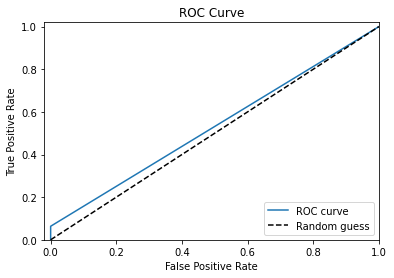

In [ ]:
y_pred_prob = clf_b.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
roc_auc_score(y_val, y_pred_prob)

0.5317460317460317

## Complement Naive Bayes


In [ ]:
clf_co = ComplementNB()
clf_co.fit(X_train, y_train)
clf_co.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.8508771929824561

In [ ]:
y_pred = clf_co.predict(X_val)
cm = confusion_matrix(y_val, y_pred)  
print(cm)

[[37 14]
 [ 3 60]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.73      0.81        51
         1.0       0.81      0.95      0.88        63

    accuracy                           0.85       114
   macro avg       0.87      0.84      0.84       114
weighted avg       0.86      0.85      0.85       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


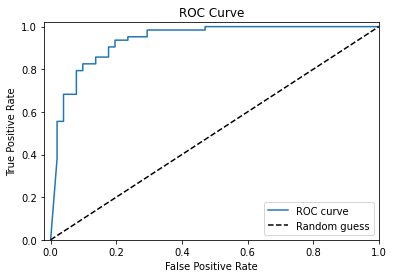

In [ ]:
y_pred_prob = clf_co.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
roc_auc_score(y_val, y_pred_prob)

0.9365079365079365

## Categorical Naive Bayes

In [ ]:
clf_ca = CategoricalNB()
clf_ca.fit(X_train, y_train)
clf_ca.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


IndexError: ignored

## Complex Bayes net (optional)

In [ ]:
clf_x = GaussianNB()
clf_x.partial_fit(X_train, y_train, classes=np.unique(y_train))
clf_x.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.9210526315789473